In [ ]:
# 2, 4, 5, 3, 15, 10, 20, 30

Enter numbers separated by commas: 2, 4, 5, 3, 15, 10, 20, 30
NumPy array: [ 2  4  5  3 15 10 20 30]
Enter the value of k: 2

Initial Centroids: [2, 4]

--- Iteration 1 ---

Clusters formed:
Cluster 1: [2, 3]
Cluster 2: [4, 5, 15, 10, 20, 30]
Centroid 1 updated from 2 to 2.5
Centroid 2 updated from 4 to 14.0

--- Iteration 2 ---

Clusters formed:
Cluster 1: [2, 4, 5, 3]
Cluster 2: [15, 10, 20, 30]
Centroid 1 updated from 2.5 to 3.5
Centroid 2 updated from 14.0 to 18.75

--- Iteration 3 ---

Clusters formed:
Cluster 1: [2, 4, 5, 3, 10]
Cluster 2: [15, 20, 30]
Centroid 1 updated from 3.5 to 4.8
Centroid 2 updated from 18.75 to 21.67

--- Iteration 4 ---

Clusters formed:
Cluster 1: [2, 4, 5, 3, 10]
Cluster 2: [15, 20, 30]

Converged Clusters.

=== Final Result ===
Cluster 1: [2, 4, 5, 3, 10]
Cluster 2: [15, 20, 30]
Final Centroids: [4.8, 21.67]


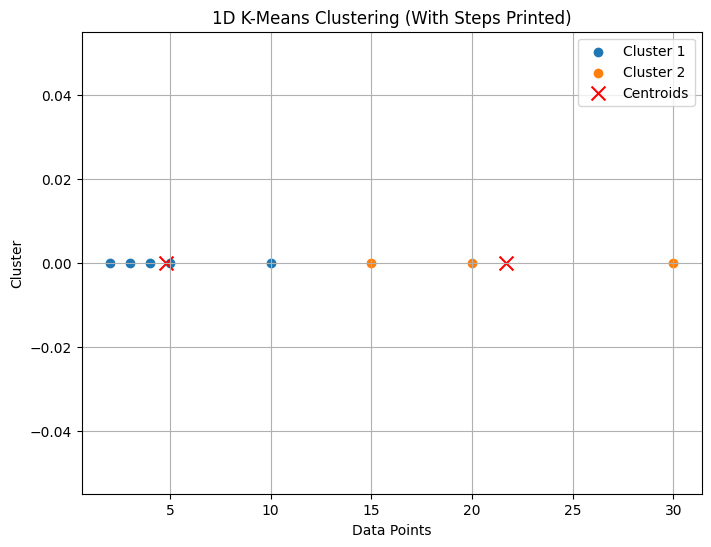

In [1]:
import numpy as np
import matplotlib.pyplot as plt

user_input = input("Enter numbers separated by commas: ")
data = np.array([int(x.strip()) for x in user_input.split(',')])

print("NumPy array:", data)

# Example 1D data
# data = np.array([2, 4, 5, 3, 15, 10, 20, 30])

# Input k (number of clusters)
k = int(input("Enter the value of k: "))

# Initialize centroids using first k data points
k_means = []
for i in range(k):
    k_means.append(int(data[i]))

print("\nInitial Centroids:", k_means)

# Function to calculate distance
def distance(a, b):
    return abs(a - b)

# Create empty clusters
clusters = [[] for _ in range(k)]
clusters_new = [[] for _ in range(k)]

# Set maximum iterations
max_iterations = 10

# Begin iterations
for iteration in range(max_iterations):
    print(f"\n--- Iteration {iteration+1} ---")

    # Create fresh clusters
    clusters_new = [[] for _ in range(k)]

    # Assign points to nearest cluster
    for point in data:
        distances = [distance(point, mean) for mean in k_means]
        closest_mean = np.argmin(distances)
        clusters_new[closest_mean].append(int(point))
    print("\nClusters formed:")
    for i in range(k):
        print(f"Cluster {i+1}: {clusters_new[i]}")

    # Check if clusters stopped changing
    if clusters == clusters_new:
        print("\nConverged Clusters.")
        break

    # Update clusters
    clusters = clusters_new

    # Update centroids
    for j in range(k):
        if clusters[j]:  # Only if cluster is not empty
            old_mean = k_means[j]
            k_means[j] = float(np.mean(clusters[j]))
            print(f"Centroid {j+1} updated from {round(old_mean, 2)} to {round(k_means[j], 2)}")

print("\n=== Final Result ===")
for i in range(k):
    print(f"Cluster {i+1}: {clusters[i]}")
print("Final Centroids:", [round(x, 2) for x in k_means])

# Visualization
plt.figure(figsize=(8, 6))

for i, cluster in enumerate(clusters):
    plt.scatter(cluster, [0]*len(cluster), label=f"Cluster {i+1}")  # Plot points at y=0
plt.scatter(k_means, [0]*len(k_means), marker='x', s=100, c='red', label='Centroids')
plt.xlabel("Data Points")
plt.ylabel("Cluster")
plt.title("1D K-Means Clustering (With Steps Printed)")
plt.legend()
plt.grid(True)
plt.show()
